In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv("C:/Users/saisi/Downloads/Churn_Modelling.csv")

In [119]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [120]:
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [122]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [123]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [124]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

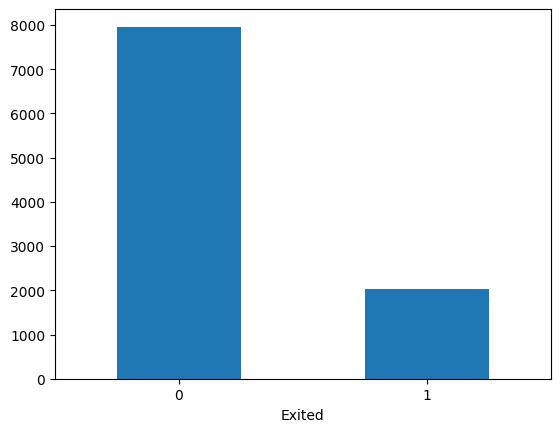

In [125]:
df["Exited"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

In [126]:
not_Exited=df[df["Exited"]==0]
Exited=df[df["Exited"]==1]
print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [127]:
not_Exited=not_Exited.sample(Exited.shape[0],random_state=42)
df_new=pd.concat([not_Exited, Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

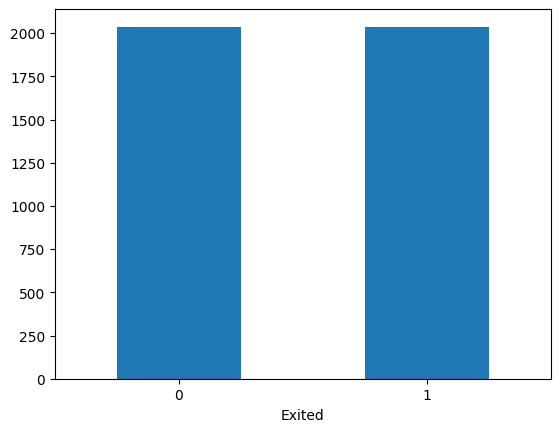

In [128]:
df_new["Exited"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)

In [129]:
corr=df_new.corr()

<Axes: >

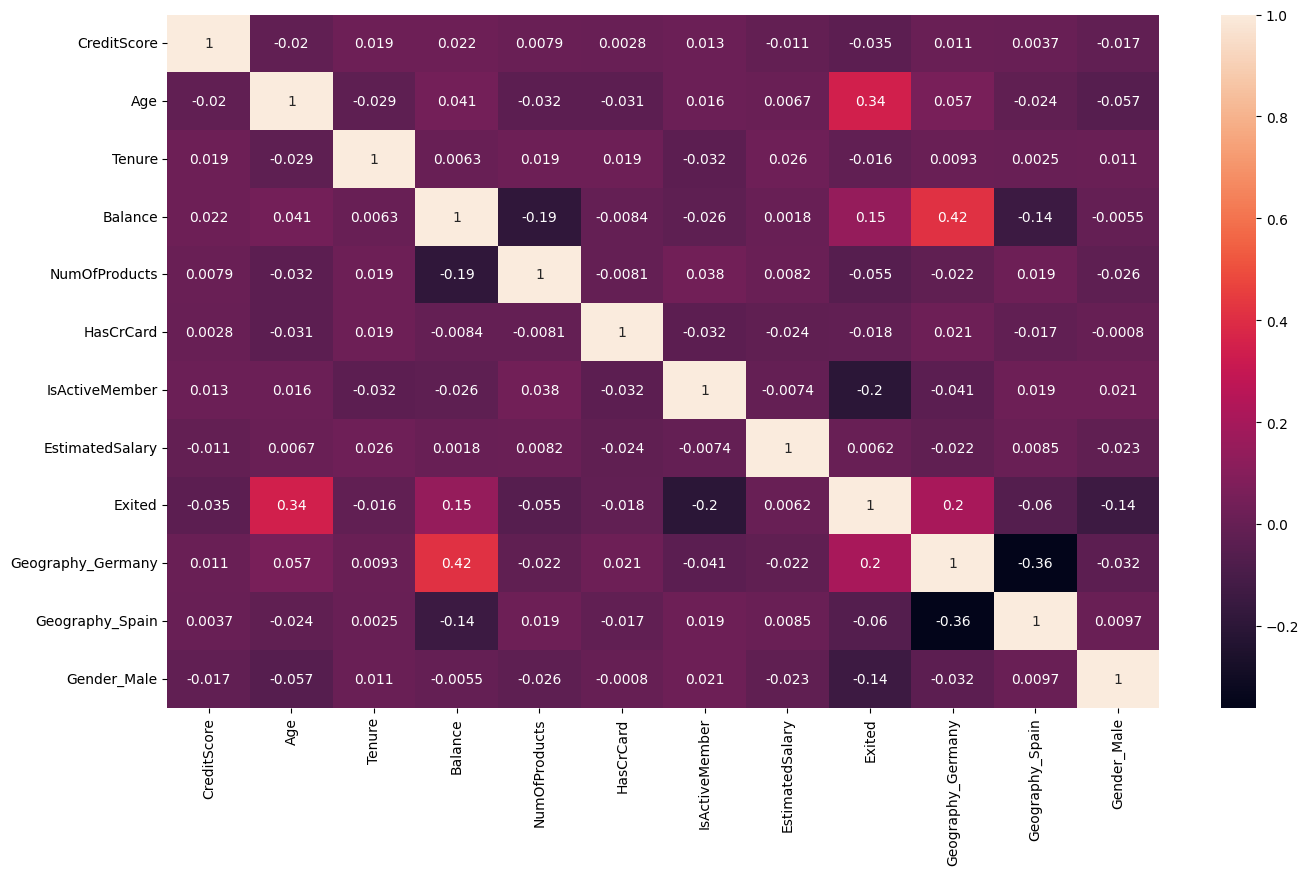

In [130]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [131]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from xgboost import XGBClassifier

In [132]:
X = df.drop(columns = "Exited" , axis = 1)
y = df_new["Exited"]

In [133]:
columns = df_new.columns.tolist() 
columns.remove('Exited')

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.460730,-0.183251,1.032908,1.253748,0.807737,0.646092,-1.030670,-0.191124,0,-0.578736,1.742740,0.912419
6409,0.335972,-0.564665,1.378686,-1.225848,0.807737,0.646092,0.970243,-1.066047,0,-0.578736,-0.573809,-1.095988
2157,0.967126,0.484225,-0.695982,-1.225848,0.807737,0.646092,0.970243,1.546333,0,-0.578736,-0.573809,-1.095988
1618,0.480827,-1.136786,1.032908,1.037560,0.807737,0.646092,-1.030670,-0.165180,0,-0.578736,-0.573809,0.912419
1633,-0.915988,-0.373958,0.687130,-1.225848,-0.911583,-1.547768,-1.030670,-0.890675,0,-0.578736,-0.573809,0.912419
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.578181,0.293517,-0.695982,1.210909,-0.911583,0.646092,0.970243,-0.811111,1,1.727904,-0.573809,0.912419
9982,0.046263,0.674932,0.687130,0.972192,-0.911583,0.646092,-1.030670,0.261812,1,1.727904,-0.573809,-1.095988
9991,-0.553850,1.342407,-0.350204,0.190648,-0.911583,0.646092,-1.030670,-0.533938,1,-0.578736,-0.573809,-1.095988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1,-0.578736,-0.573809,-1.095988


In [ ]:
X_train, X_test, y_train, y_test = train_test_split([1000,1], [2,4072], test_size=0.2, train_size=0.1,stratify=y, random_state=24)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
results_df = pd.DataFrame(results).T
results_df

In [ ]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [134]:
import joblib
joblib.dump(Gradient_model, 'Gradient_model.pkl')

['Gradient_model.pkl']